## Problem Statement

Problem faced by every property seller is to determine the sale price of the property. It is beneficial to both buyer and seller to predict exact price of property according to price trends and demand in the market. Various features such has number of rooms, property area, property dimension, age of the property are some of key features taken into consideration while predicting the price.therefore, regression analysis can be useful in predicting the price of the house.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Display Options

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None
# display all rows of the dataframe
pd.options.display.max_rows = 100

## Reading Data

In [4]:
df_property = pd.read_csv('E:/Imarticus/Semester 2/Machine learning Python/Sir Notes/Property Price Prediction/Dataset/HousePrices.csv')
df_property.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_property.shape

(2073, 81)

In [6]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [7]:
df_property.Zone_Class.value_counts()

RL         1611
RM          324
FV          102
RH           22
C (all)      14
Name: Zone_Class, dtype: int64

In [8]:
df_property.Alley.value_counts()

Grvl    72
Pave    57
Name: Alley, dtype: int64

In [9]:
df_property[df_property.Dwell_Type > 300]

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
1538,1539,303,RM,120.0,9596,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,RRAe,Norm,1Fam,2Story,4,9,1979,2007,Gable,CompShg,VinylSd,VinylSd,Stone,640.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1566,1566,GasA,Ex,Y,SBrkr,1600,0,0,1600,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,890,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
1751,1752,7080,RL,65.0,9549,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,2Story,9,8,2005,2017,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,864,864,GasA,Ex,Y,SBrkr,864,864,0,1728,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2005.0,RFn,2,572,TA,TA,Y,187,56,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,190000


In [10]:
miss_values = df_property.isnull().sum()
print("Number of missing value columns are {}".format(len(miss_values[miss_values > 0])))
miss_values[miss_values > 0].sort_values(ascending=False)

Number of missing value columns are 19


PoolQC          2065
MiscFeature     1993
Alley           1944
Fence           1669
FireplaceQu      988
LotFrontage      320
GarageType       113
GarageYrBlt      113
GarageFinish     113
GarageQual       113
GarageCond       113
BsmtExposure      61
BsmtFinType2      60
BsmtFinType1      59
BsmtCond          59
BsmtQual          59
MasVnrArea        14
MasVnrType        14
Electrical         1
dtype: int64

In [11]:
df_property.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

From the above output, we can see that 'Dwell_Type', 'OverallQual' and 'OverallCond' have data type as 'int64'.
But as per the data definition, 'Dwell_Type ', 'OverallQual' and 'OverallCond' are categorical variables, so we need to convert these variables data type to 'object'.

In [12]:
df_property['Dwell_Type'] = df_property['Dwell_Type'].astype('O')
df_property['OverallQual'] = df_property['OverallQual'].astype('O')
df_property['OverallCond'] = df_property['OverallCond'].astype('O')

**Let us now remove the Id column as this will not be necessary for our analysis**

In [13]:
df_property.drop(['Id'], axis=1, inplace=True)

In [14]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2073 non-null   object 
 1   Zone_Class           2073 non-null   object 
 2   LotFrontage          1753 non-null   float64
 3   LotArea              2073 non-null   int64  
 4   Road_Type            2073 non-null   object 
 5   Alley                129 non-null    object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

## Summary Statistics

In [15]:
df_property.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1753.0,72.056475,27.987475,21.0,60.0,70.0,83.0,313.0
LotArea,2073.0,10717.853353,9215.982306,1300.0,7620.0,9492.0,11601.0,215245.0
YearBuilt,2073.0,1969.445731,30.222647,1872.0,1950.0,1971.0,1999.0,2010.0
YearRemodAdd,2073.0,1986.617463,20.432694,1950.0,1970.0,1995.0,2004.0,2023.0
MasVnrArea,2059.0,101.875668,179.169217,0.0,0.0,0.0,161.5,1600.0
BsmtFinSF1,2073.0,437.949349,448.051119,0.0,0.0,381.0,708.0,5644.0
BsmtFinSF2,2073.0,49.219489,165.621465,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,2073.0,565.101302,449.730940,0.0,208.0,466.0,804.0,2336.0
TotalBsmtSF,2073.0,1052.270140,431.026436,0.0,794.0,990.0,1291.0,6110.0
1stFlrSF,2073.0,1166.096961,376.975119,334.0,894.0,1095.0,1391.0,4692.0


We can see that the LotFrontage ranges from 21 feet to 313 feet, with mean 70 feet. We can see that the minimum pool area is 0 sq.ft. and this means that not all houses have pools and yet have been considered to calculate the mean pool area. Also the count for LotFrontage is less than the total number of observations which indicates the presence of missing values.

In [16]:
df_property.describe(include = object).transpose()

,count,unique,top,freq
Dwell_Type,2073,18,20,722
Zone_Class,2073,5,RL,1611
Road_Type,2073,2,Pave,2063
Alley,129,2,Grvl,72
Property_Shape,2073,4,Reg,1300
LandContour,2073,4,Lvl,1854
Utilities,2073,2,AllPub,2070
LotConfig,2073,5,Inside,1481
LandSlope,2073,3,Gtl,1958
Neighborhood,2073,25,NAmes,317


Number of observations = 2073\
Number of unique classes in the column = 4 classes\
The most occurring class = Reg\
Frequency of the most repeated class out of 2073 observations Reg has a frequency of 925

The variable PoolQC has only 8 non-zero values out of 2073 observations and also the variable PoolArea contains the area of these 8 pools, we will remove the variables PoolQC and PoolArea.

In [17]:
df_property.PoolQC.isnull().sum()

2065

In [18]:
df_property = df_property.drop(['PoolQC', 'PoolArea'], axis= 1)
df_property.shape

(2073, 78)

## Distribution of variables

In [19]:
df_numeric_features = df_property.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [20]:
df_numeric_features.shape

(2073, 33)

In [21]:
plt.rcParams["figure.figsize"] = [20,15]

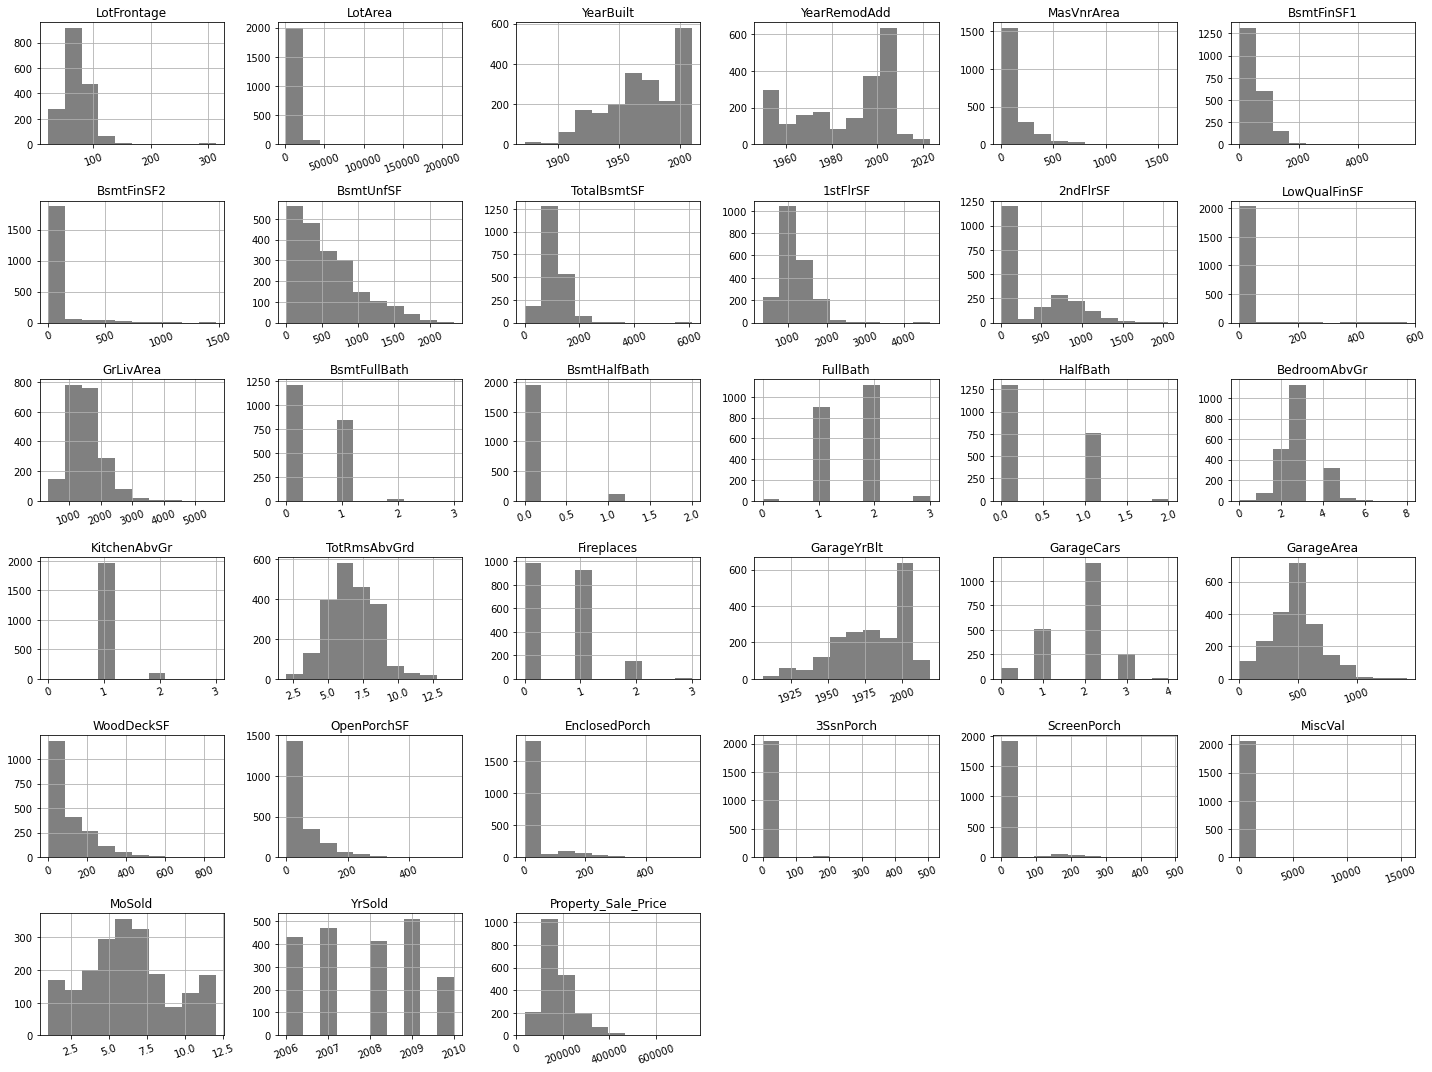

In [22]:
df_numeric_features.hist(xrot = 20, color = "grey")
plt.tight_layout()
plt.show()  

#### Visualize the target variable

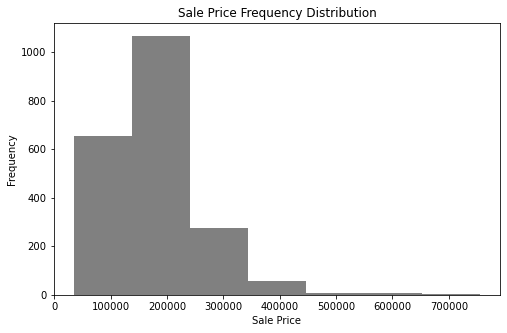

In [23]:
plt.figure(figsize=(8,5))
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Sale Price Frequency Distribution")
plt.hist(df_property["Property_Sale_Price"], color = 'grey',bins=7)
plt.show()

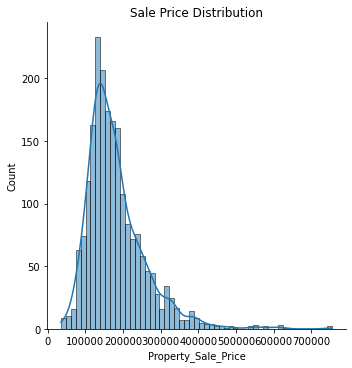

In [24]:
import seaborn as sns
sns.displot(df_property["Property_Sale_Price"],kde=True)
plt.title('Sale Price Distribution')
plt.show()

The above plot shows that the target variable 'Property_Sale_Price' is right skewed

In [25]:
cat_vars = df_property.dtypes[df_property.dtypes == 'object'].index
cat_vars = [ x for x in cat_vars]
cat_vars

['Dwell_Type',
 'Zone_Class',
 'Road_Type',
 'Alley',
 'Property_Shape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'Dwelling_Type',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
df_cat_features = df_property.select_dtypes(include='object')

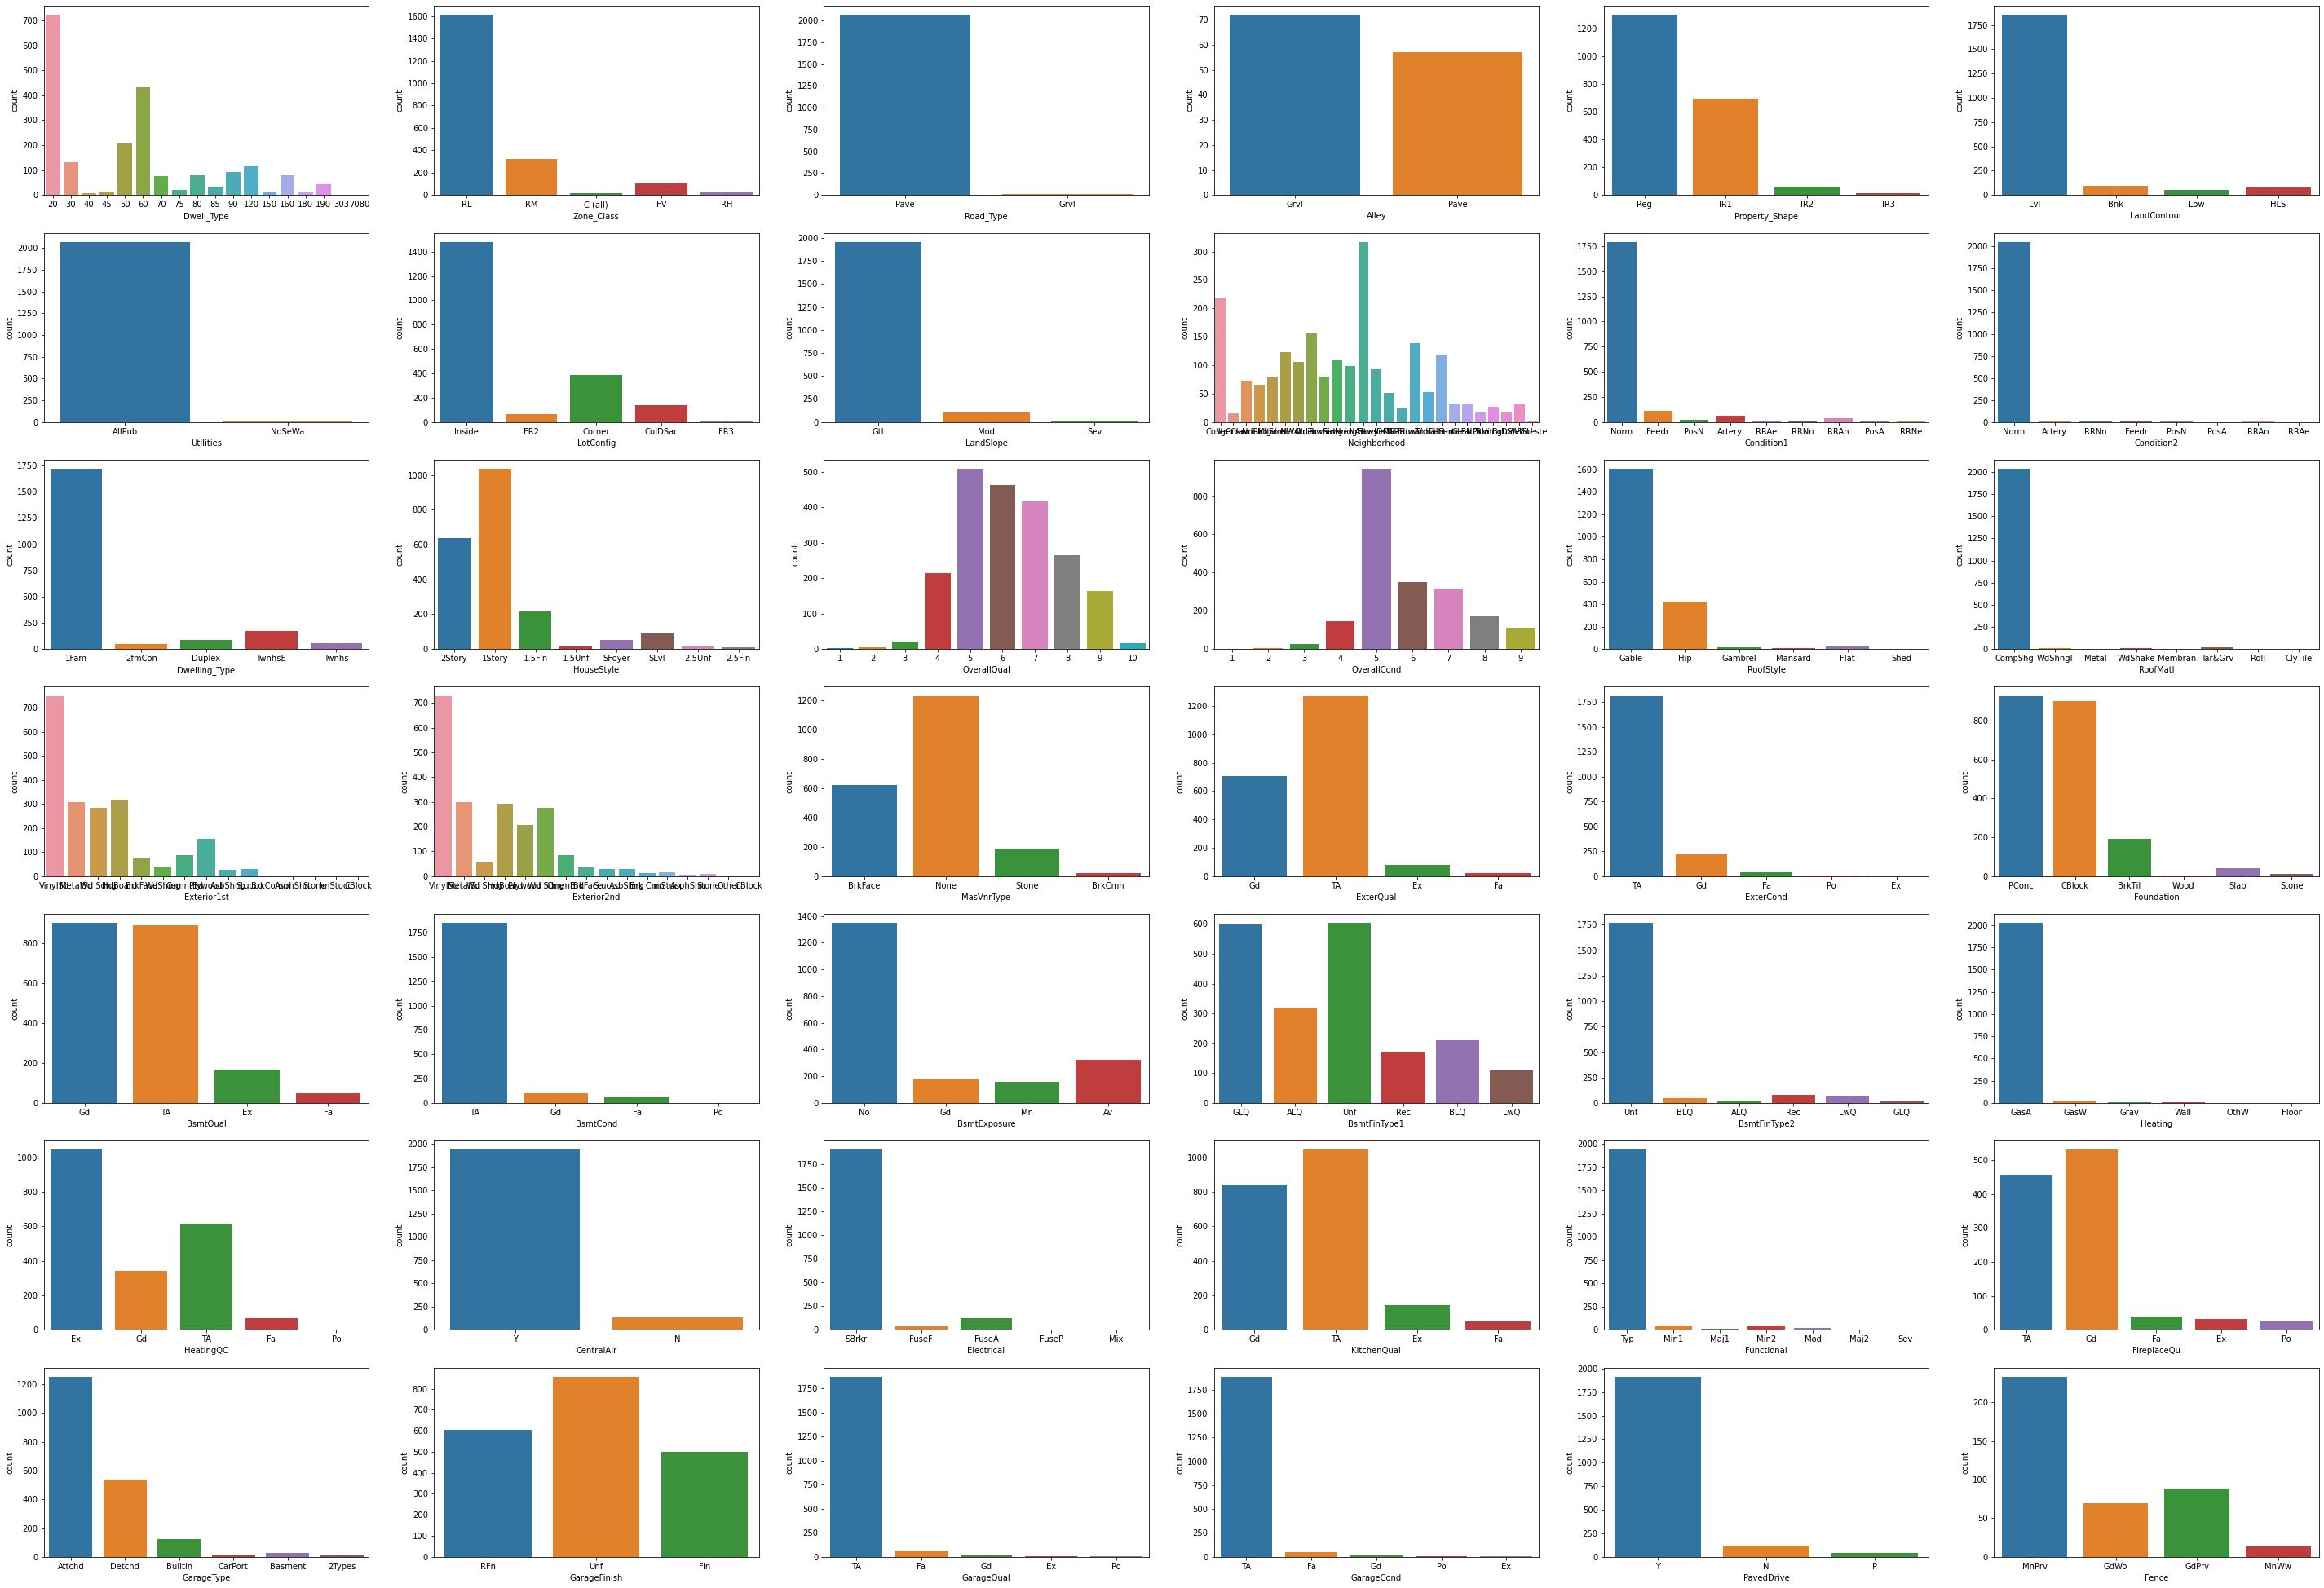

In [27]:
from pandas.api.types import is_string_dtype
categorical=[]
for column in df_property:
    if is_string_dtype(df_property[column]):
        categorical.append(column)
fig, ax = plt.subplots(nrows=7, ncols=6, figsize = (50, 35))
for variable, subplot in zip(cat_vars, ax.flatten()):
    sns.countplot(x=df_property[variable], ax = subplot)
plt.show()

#### Boxplot of OverallQuality and Property_Sale_Price

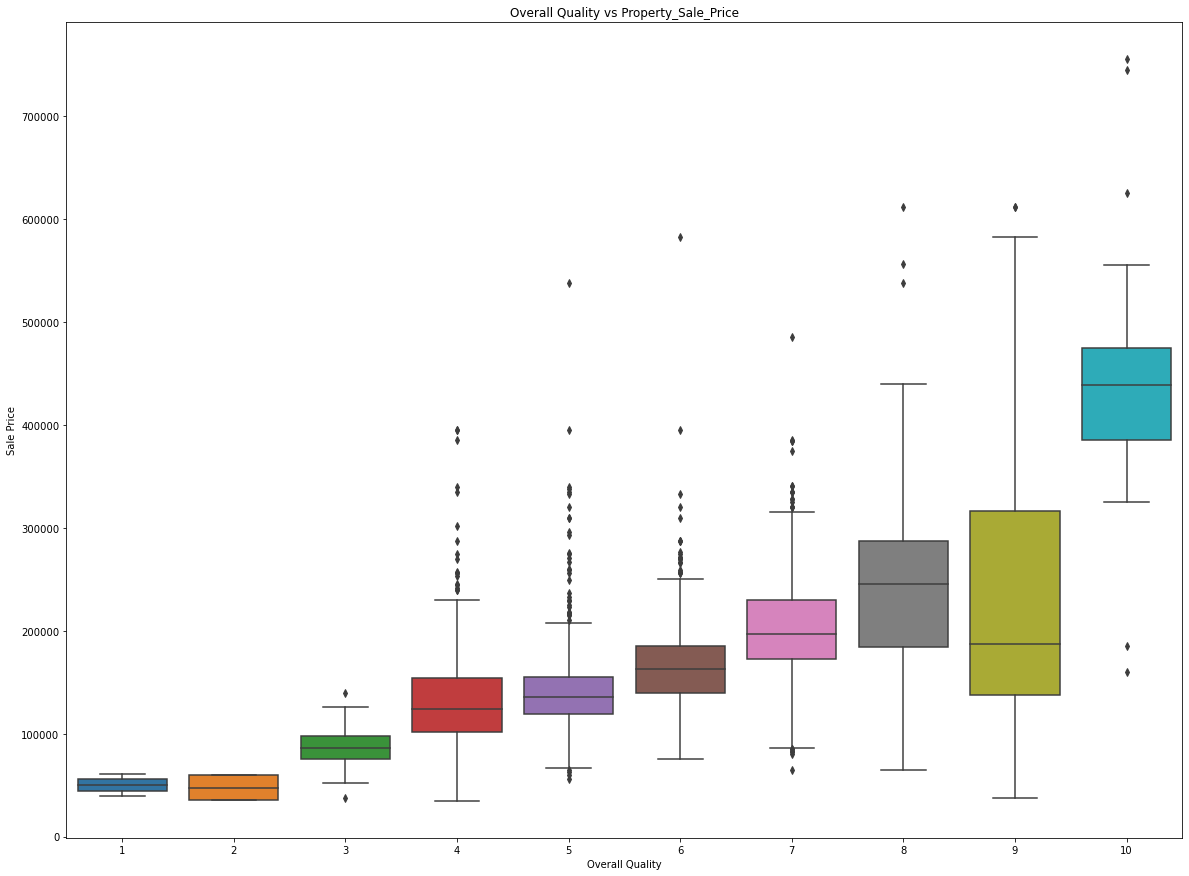

In [28]:
sns.boxplot(y="Property_Sale_Price", x="OverallQual", data= df_property)
plt.title("Overall Quality vs Property_Sale_Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

#### Boxplot of Overall Condition and Property_Sale_Price

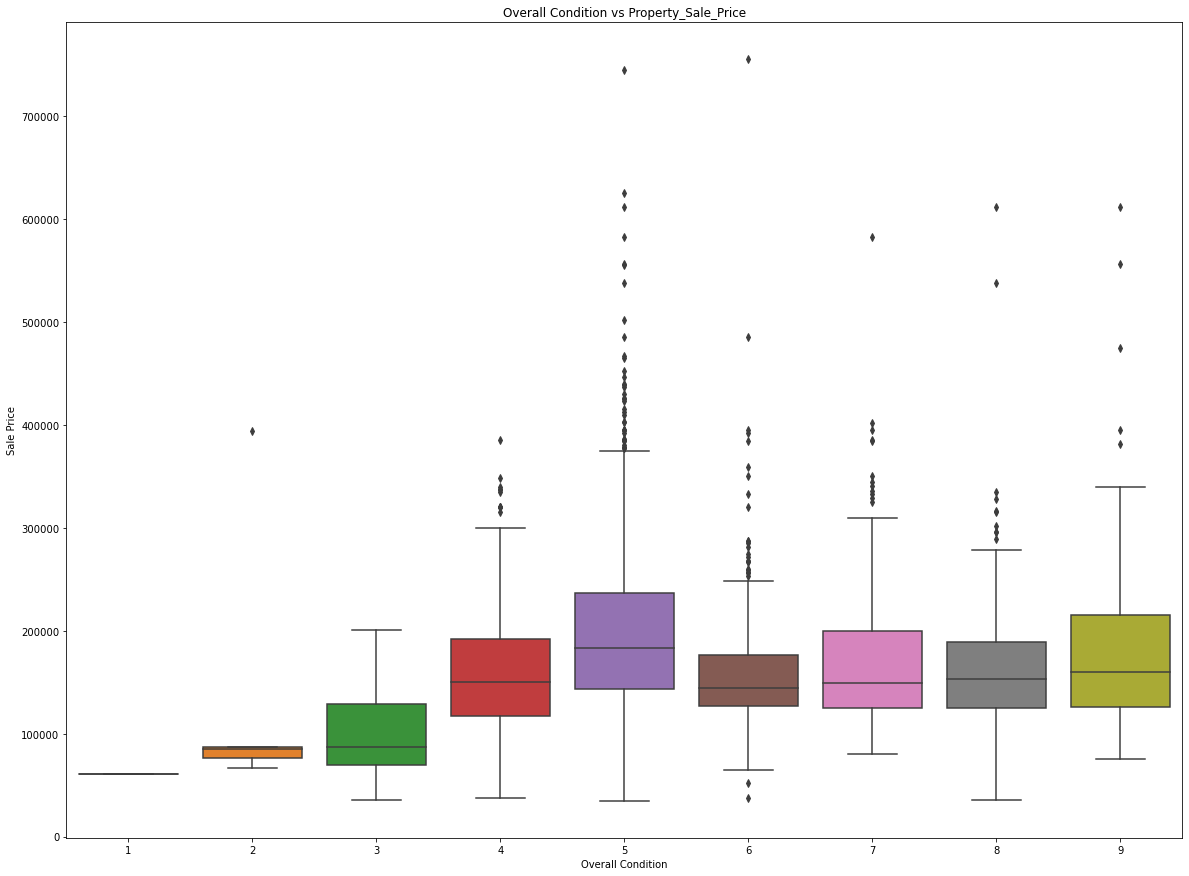

In [29]:
sns.boxplot(y="Property_Sale_Price", x="OverallCond", data= df_property)
plt.title("Overall Condition vs Property_Sale_Price")
plt.xlabel("Overall Condition")
plt.ylabel("Sale Price")
plt.show()

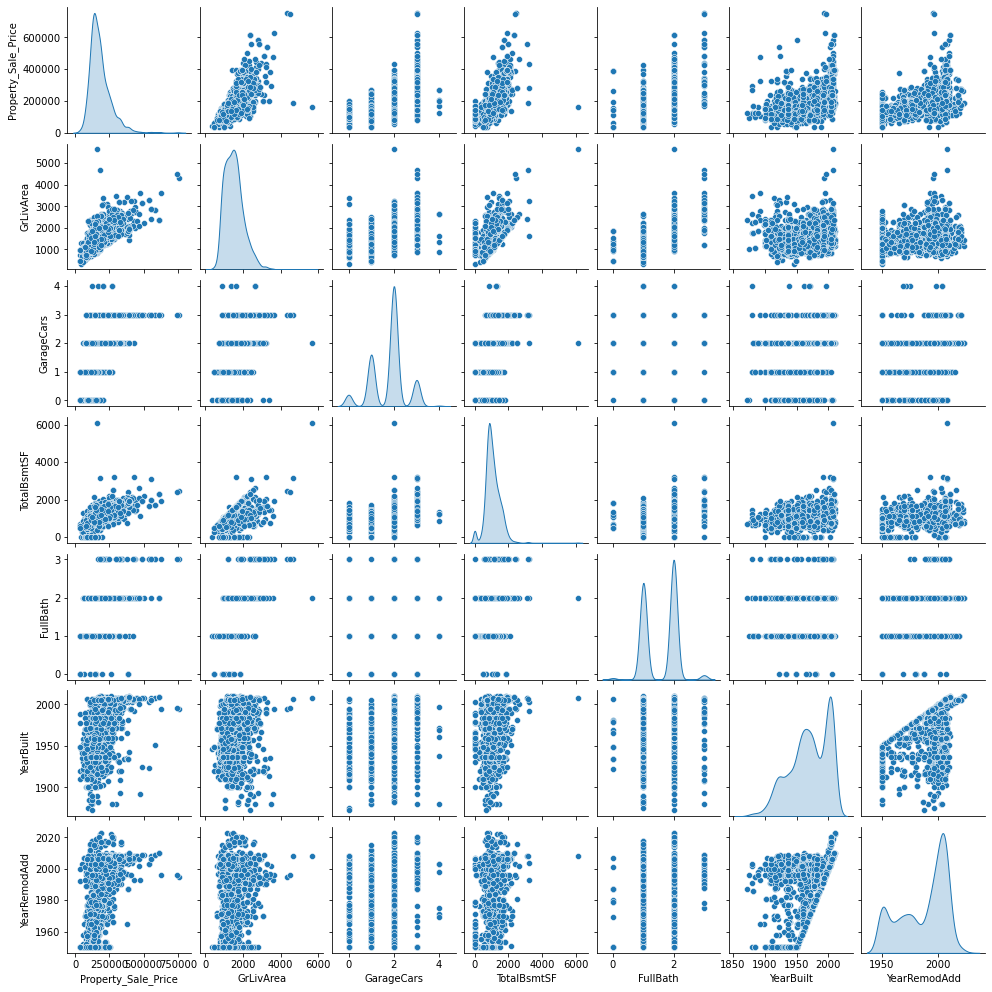

In [30]:
columns= ["Property_Sale_Price", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd"]
sns.pairplot(df_property[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

### Outliers Discovery

In [31]:
IQR = df_property.Property_Sale_Price.quantile(.75) - df_property.Property_Sale_Price.quantile(.25)
LL = df_property.Property_Sale_Price.quantile(.25) - 1.5 * IQR
UL = df_property.Property_Sale_Price.quantile(.75) + 1.5 * IQR
print(IQR, LL, UL)

84000.0 4000.0 340000.0


In [32]:
sum(df_property.Property_Sale_Price >= 500000)

14

In [33]:
df_property.shape

(2073, 78)

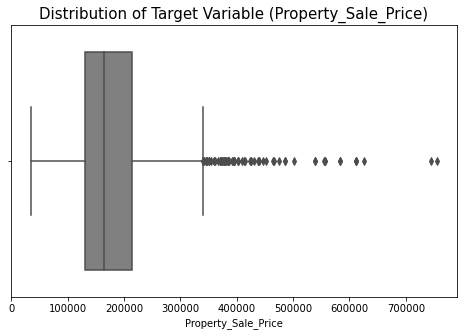

In [34]:
plt.figure(figsize = (8,5))
sns.boxplot(df_property['Property_Sale_Price'], color='grey')
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.show()

From the above plot we can see that there are outliers present in the target variable 'Property_Sale_Price'. Outliers badly affect the prediction of the regression model and thus, we will remove these outliers.

In [35]:
df_property = df_property[df_property['Property_Sale_Price'] < 500000]
df_property.shape

(2059, 78)

### Missing Values

In [36]:
total_nulls = df_property.isnull().sum().sort_values(ascending = False)          
percent_null = (df_property.isnull().sum()*100/df_property.isnull().count())  
percent_null = percent_null.sort_values(ascending = False) 
missing_values = pd.concat([total_nulls, percent_null], axis = 1, keys = ['Total Nulls', 'Percentage of Missing Values'])    
missing_values['Data Type'] = df_property[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
LotFrontage,320,15.541525,float64
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
GarageYrBlt,113,5.488101,float64


We can observe that 18 variables contain the missing values.

In [37]:
num_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] != 'object')]
num_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
LotFrontage,320,15.541525,float64
GarageYrBlt,113,5.488101,float64
MasVnrArea,14,0.679942,float64


*The variable LotFrontage is right skewed and thus we will fill the missing values with its median value*

In [38]:
df_property['LotFrontage'] = df_property['LotFrontage'].fillna(df_property['LotFrontage'].median())

In [39]:
print(df_property.LotFrontage.mean())
print(df_property.LotFrontage.median())

71.58183584264206
70.0


*We will replace the missing values in the numeric variable GarageYrBlt by 0. The missing values in this variable indicates that there are 81 observations for which garage facility is not available.*

In [40]:
df_property['GarageYrBlt'] = df_property['GarageYrBlt'].fillna(0)

*The variable MasVnrArea is positively skewed and thus we will fill the missing values with its median value*

In [41]:
print(df_property.MasVnrArea.mean())
print(df_property.MasVnrArea.median())

98.54083129584352
0.0


In [42]:
df_property.shape[0]

2059

In [43]:
df_property.shape[0] - sum(df_property.MasVnrArea > 0.0)


1242

In [44]:
df_property.groupby(['Dwell_Type'])['MasVnrArea'].median()

Dwell_Type
20        0.0
30        0.0
40        0.0
45        0.0
50        0.0
60       75.5
70        0.0
75        0.0
80       43.5
85        0.0
90        0.0
120      66.0
150      28.0
160      42.0
180       0.0
190       0.0
303     640.0
7080      0.0
Name: MasVnrArea, dtype: float64

In [45]:
df_property.loc[df_property.Dwell_Type == 60, 'MasVnrArea'].count()

418

In [46]:
df_property.loc[df_property.Dwell_Type == 120, 'MasVnrArea'] = df_property.loc[df_property.Dwell_Type == 120, 'MasVnrArea'].fillna(df_property.loc[df_property.Dwell_Type == 120,'MasVnrArea'].median())

In [47]:
df_property['MasVnrArea'] = df_property['MasVnrArea'].fillna(df_property['MasVnrArea'].median())

In [48]:
df1 = df_property[df_property['MasVnrArea'].isnull()]

In [49]:
cat_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] == 'object')]
cat_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
BsmtExposure,61,2.962603,object
BsmtFinType2,60,2.914036,object


In [50]:
df_property['MiscFeature'] = df_property['MiscFeature'].fillna('None')
df_property['Alley'] = df_property['Alley'].fillna('No alley access')
df_property['Fence'] = df_property['Fence'].fillna('No Fence')
df_property['FireplaceQu'] = df_property['FireplaceQu'].fillna('No Fireplace')

In [51]:
for col in ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']:
    df_property[col].fillna('No Garage', inplace = True)

In [52]:
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    df_property[col].fillna('No Basement', inplace = True)

In [53]:
df_property['MasVnrType'] = df_property['MasVnrType'].fillna('None')

In [54]:
mode_electrical = df_property['Electrical'].mode()
mode_electrical

0    SBrkr
Name: Electrical, dtype: object

In [55]:
mode_electrical = df_property['Electrical'].mode()
df_property['Electrical'].fillna(mode_electrical[0] , inplace = True)

## Studying correlation

In [56]:
df_corr = df_property.corr()

<AxesSubplot:>

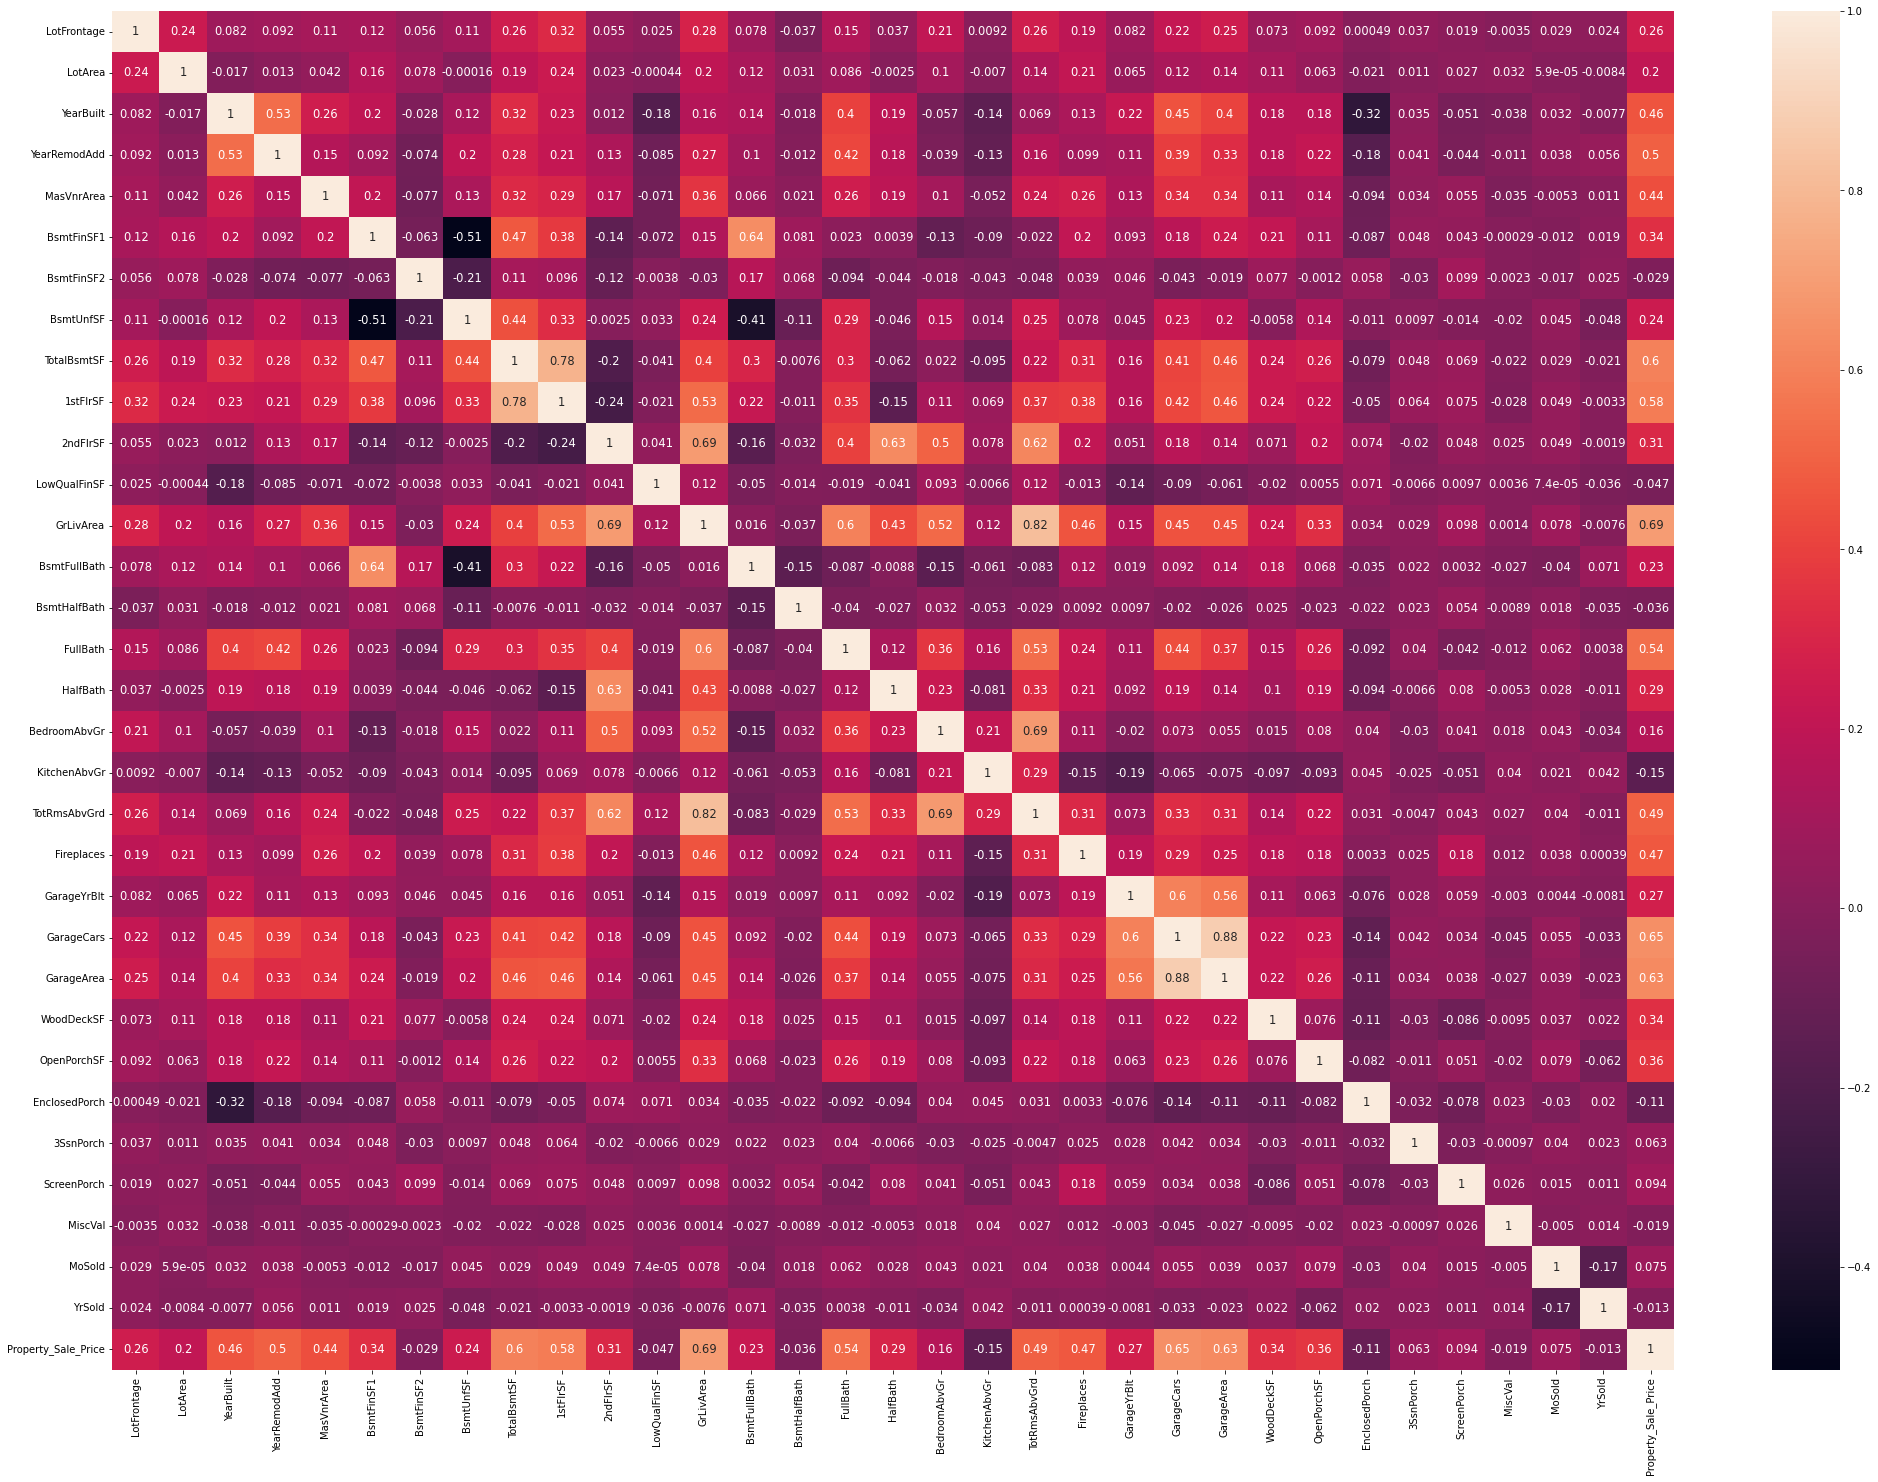

In [57]:
plt.figure(figsize = (35,25))
sns.heatmap(df_corr, annot = True, annot_kws = {"size": 11.5})

From the above plot we can see that the highest positive correlation (= 0.88) is between the variables 'GarageArea' and 'GarageCars'. Also there is strong positive correlation between the pairs (1StFlrSF, TotalBsmtSF) and (TotRmsAbvGrd, GrlivArea). There may be multicollinearity present.
No two variables have strong negative correlation in the dataset.
Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.

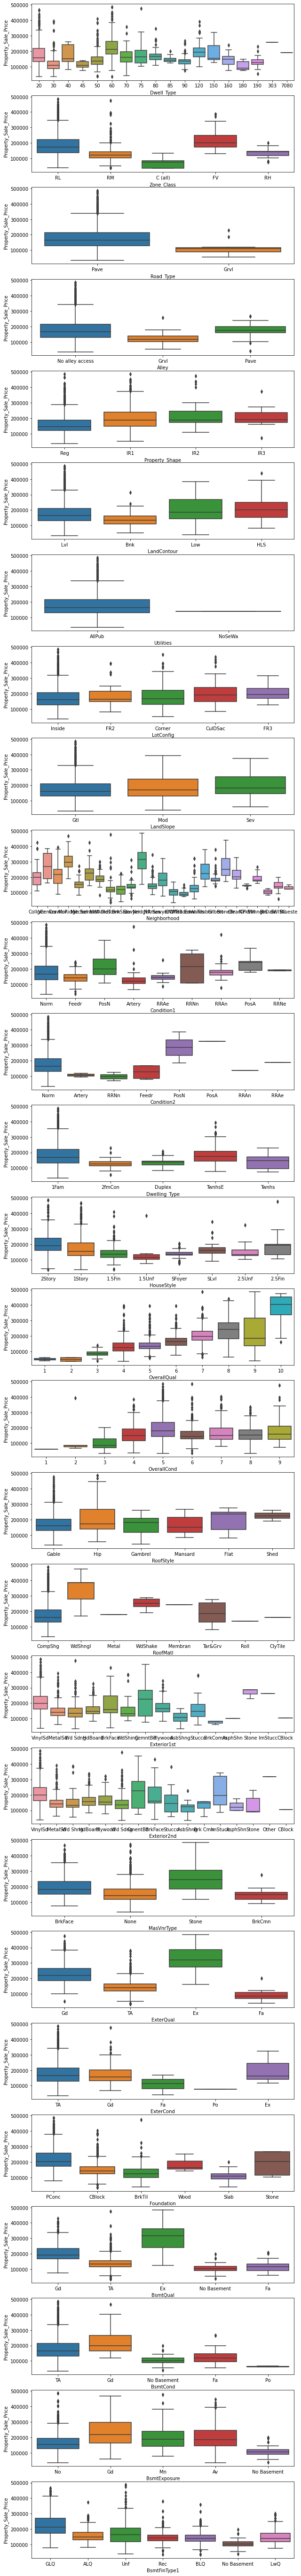

In [58]:
categorical=[]
for column in df_property:
   if is_string_dtype(df_property[column]):
        categorical.append(column)
fig, ax = plt.subplots(nrows = 28, ncols = 1, figsize = (10, 100))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = variable, y = 'Property_Sale_Price', data = df_property, ax = subplot)
plt.show()

It can be seen that most of the categorical variables have an effect on the sale price of the property. The median sale price rises exponentially with respect to the rating of the overall quality of the material used.

## Checking for Normality

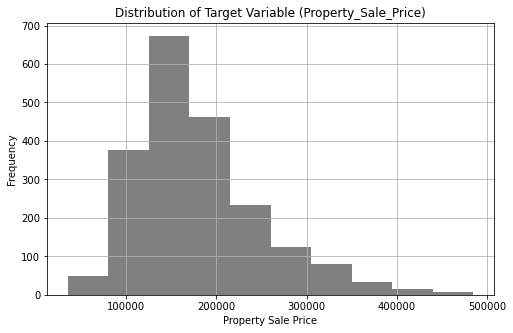

In [59]:
plt.figure(figsize = (8,5))
df_property.Property_Sale_Price.hist(color = 'grey')
plt.title('Distribution of Target Variable (Property_Sale_Price)')
plt.xlabel('Property Sale Price')
plt.ylabel('Frequency')
plt.show()

We can see that the variable 'Property_Sale_Price' is positively skewed and thus we can say that it is not normally distributed.

**If the data is not normally distributed, use log transformation to reduce the skewness and get a near normally distributed data**

In [60]:
df_property['log_Property_Sale_Price'] = np.log(df_property['Property_Sale_Price'])
df_property.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


**Recheck for normality by plotting histogram**

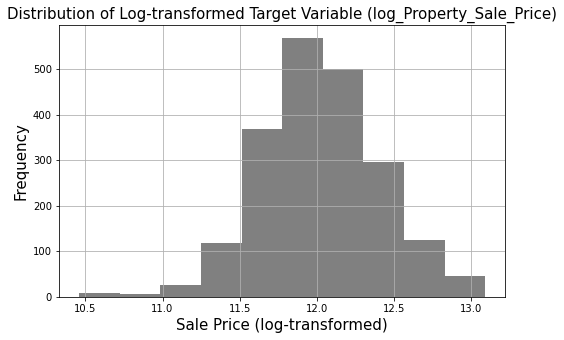

In [61]:
plt.figure(figsize = (8,5))
df_property.log_Property_Sale_Price.hist(color = 'grey')
plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

## Dummy Encode the Categorical Variables

**Filter numerical and categorical variables**

In [62]:
df_numeric_features = df_property.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price'],
      dtype='object')

In [63]:
df_categoric_features = df_property.select_dtypes(include = object)
df_categoric_features.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [64]:
df_categoric_features.shape

(2059, 45)

**Dummy encode the catergorical variables**

In [65]:
# to create the dummy variables  we use 'get_dummies()' from pandas 
# to create (n-1) dummy variables we use 'drop_first = True' 
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [66]:
dummy_encoded_variables.shape

(2059, 254)

**Concatenate numerical and dummy encoded categorical variables**

In [67]:
df_property_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)
df_property_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,Garage

In [68]:
df_property_dummy.shape

(2059, 288)

## Linear Regression (OLS)

### Multiple Linear Regression Full Model with Log Transformed Dependent Variable (OLS)

In [69]:
df_property_dummy = sm.add_constant(df_property_dummy)
X = df_property_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)
y = df_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1544, 287), (515, 287), (1544, 2), (515, 2))

In [71]:
linreg_logmodel_full = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()
print(linreg_logmodel_full.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.940
Model:                                 OLS   Adj. R-squared:                  0.927
Method:                      Least Squares   F-statistic:                     74.19
Date:                     Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                             22:58:35   Log-Likelihood:                 1429.1
No. Observations:                     1544   AIC:                            -2320.
Df Residuals:                         1275   BIC:                            -883.1
Df Model:                              268                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

This model explains around 94% of the variation in dependent variable log_Property_Sale_Price.

In [72]:
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

In [73]:
predicted_Property_Sale_Price = np.exp(linreg_logmodel_full_predictions)
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [74]:
predicted_Property_Sale_Price[:6]

1187    290369.014062
1716    192861.033106
926     313177.458796
111     168314.534095
1017    194167.362992
1107    237326.070613
dtype: float64

In [75]:
actual_Property_Sale_Price[:6]

1187    262000
1716    215000
926     285000
111     180000
1017    187500
1107    274725
Name: Property_Sale_Price, dtype: int64

In [76]:
linreg_logmodel_full_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)
linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared
linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj 

In [77]:
print(linreg_logmodel_full_rmse)
print(linreg_logmodel_full_rsquared)
print(linreg_logmodel_full_rsquared_adj)

25019.988006846947
0.9397422488992085
0.9270763059227285


In [78]:
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']
result_tabulation = pd.DataFrame(columns = cols)
linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,25019.988007,0.939742,0.927076


### Multiple Linear Regression Full Model without Log Transformed Target Variable (OLS)

In [79]:
linreg_nolog_model = sm.OLS(y_train['Property_Sale_Price'], X_train).fit()
print(linreg_nolog_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.938
Model:                             OLS   Adj. R-squared:                  0.925
Method:                  Least Squares   F-statistic:                     71.63
Date:                 Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                         22:58:35   Log-Likelihood:                -17298.
No. Observations:                 1544   AIC:                         3.513e+04
Df Residuals:                     1275   BIC:                         3.657e+04
Df Model:                          268                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [80]:
linreg_nolog_model_predictions = linreg_nolog_model.predict(X_test)

In [81]:
linreg_nolog_model_rmse = rmse(actual_Property_Sale_Price, linreg_nolog_model_predictions)
linreg_nolog_model_rsquared = linreg_nolog_model.rsquared
linreg_nolog_model_rsquared_adj = linreg_nolog_model.rsquared_adj 

In [82]:
linreg_nolog_model_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_nolog_model_rmse,
                                                 'R-Squared': linreg_nolog_model_rsquared,
                                                 'Adj. R-Squared': linreg_nolog_model_rsquared_adj})
result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,25019.988007,0.939742,0.927076
1,Linreg full model without log of target variable,32994.987301,0.937719,0.924628


If we compare the results in the table we can see that the linreg model withh log of target variable is performing slightly better than the model without log of target variable. Thus we will continue with the target variable 'log_Property_Sale_Price'.

## Feature Engineering

In [83]:
## Creating a TotalBsftSF column from all basement square feet values.
df_property['TotalBsmtSF'] = df_property['BsmtFinSF1'] + df_property['BsmtFinSF2'] + df_property['BsmtUnfSF']

# create a new variable 'TotalSF' using the variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'
df_property['TotalSF'] = df_property['TotalBsmtSF'] + df_property['1stFlrSF'] + df_property['2ndFlrSF'] + df_property['GrLivArea']

# as we have created a new variable using the variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' and 'GrLivArea', we will remove them
df_property = df_property.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"], axis=1)

In [84]:
## Dropping all basement sf columns since it is already used to calculate totalsf.
df_property = df_property.drop(["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"], axis=1)

In [85]:
import datetime as dt
current_year = int(dt.datetime.now().year)

In [86]:
Buiding_age = current_year - df_property.YearBuilt
Remodel_age = current_year - df_property.YearRemodAdd

In [87]:
df_property['Buiding_age'] = Buiding_age
df_property['Remodel_age'] = Remodel_age
# as we have added a new variable using the variables 'YearBuilt' and 'YearRemodAdd', we will drop them
df_property = df_property.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

### Feature Selection using Variance Inflation Factor

In [88]:
df_property_features = df_property.drop(['Property_Sale_Price', 'log_Property_Sale_Price'], axis = 1)
df_numeric_features_vif = df_property_features.select_dtypes(include=[np.number])
df_numeric_features_vif.head()

,LotFrontage,LotArea,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,TotalSF,Buiding_age,Remodel_age
0,65.0,8450,196.0,0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,4276,19,19
1,80.0,9600,0.0,0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,3786,46,46
2,68.0,11250,162.0,0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,4492,21,20
3,60.0,9550,0.0,0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,4190,107,52
4,84.0,14260,350.0,0,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,5541,22,22


In [89]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) 
                     for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,77.209641,YrSold
1,74.113390,TotRmsAbvGrd
2,51.770576,TotalSF
3,38.389199,GarageCars
4,33.065557,GarageYrBlt
5,31.035282,GarageArea
6,29.530388,BedroomAbvGr
7,27.909402,KitchenAbvGr
8,21.451474,FullBath
9,10.569753,LotFrontage


We can see that the variable 'YrSold' has the highest VIF. We will remove the variables having VIF greater than 10. We want to remove the variable for which the remaining variables explain more than 90% of the variation and thus we set the threshold to 10. The value of threshold is completely experimental i.e. it depends on the business requirements. One can choose the threshold other than 10.

In [90]:
for ind in range(len(df_numeric_features_vif.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    vif["Features"] = df_numeric_features_vif.columns
    vif_more_than_10 = vif[vif['VIF_Factor'] > 10]
    if(vif_more_than_10.empty == False):
        df_sorted = vif_more_than_10.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor       Features
0     9.094498    LotFrontage
1     2.653390        LotArea
2     1.631833     MasVnrArea
3     1.053572   LowQualFinSF
4     1.828080   BsmtFullBath
5     1.091342   BsmtHalfBath
6     9.636426       FullBath
7     1.726119       HalfBath
8     2.423997     Fireplaces
9     8.327266     GarageArea
10    1.755363     WoodDeckSF
11    1.739094    OpenPorchSF
12    1.289750  EnclosedPorch
13    1.025000      3SsnPorch
14    1.160607    ScreenPorch
15    1.014074        MiscVal
16    5.873779         MoSold
17    6.146684    Buiding_age
18    5.361359    Remodel_age


In [91]:
df_dummy = pd.concat([df_numeric_features_vif, dummy_encoded_variables], axis=1)
df_dummy.head()

,LotFrontage,LotArea,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,Buiding_age,Remodel_age,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQ

In [92]:
df_dummy = sm.add_constant(df_dummy)
X = df_dummy.copy()
y = df_property[['Property_Sale_Price','log_Property_Sale_Price']]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [94]:
linreg_vif_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()
print(linreg_vif_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.921
Model:                                 OLS   Adj. R-squared:                  0.904
Method:                      Least Squares   F-statistic:                     54.01
Date:                     Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                             22:58:36   Log-Likelihood:                 1150.7
No. Observations:                     1441   AIC:                            -1789.
Df Residuals:                         1185   BIC:                            -439.4
Df Model:                              255                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [95]:
linreg_vif_model_predictions = linreg_vif_model.predict(X_test)

In [96]:
predicted_Property_Sale_Price = np.exp(linreg_vif_model_predictions)
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [97]:
# calculate rmse using rmse()
linreg_vif_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_vif_model_rsquared = linreg_vif_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_vif_model_rsquared_adj = linreg_vif_model.rsquared_adj 

In [98]:
linreg_vif_model_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_vif_model_rmse,
                                                'R-Squared': linreg_vif_model_rsquared,
                                                'Adj. R-Squared': linreg_vif_model_rsquared_adj})
result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,25019.988007,0.939742,0.927076
1,Linreg full model without log of target variable,32994.987301,0.937719,0.924628
2,Linreg with VIF,27402.540487,0.920781,0.903734


In [99]:
df_property.Property_Sale_Price.mean()

178131.78436134045

## Linear Regression

In [100]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train['log_Property_Sale_Price'])
lr_model_prediction = lr_model.predict(X_test)

In [101]:
lr_model_pred_sale_price = np.exp(lr_model_prediction)

In [102]:
lr_model_pred_sale_price[:5]

array([280153.18282358, 190320.94328155, 313903.47313016, 179453.15642411,
       200688.96847855])

In [103]:
r2_score(actual_Property_Sale_Price, lr_model_pred_sale_price)

0.7835314404779313

In [104]:
# calculate rmse using rmse()
lr_model_rmse = rmse(actual_Property_Sale_Price, lr_model_pred_sale_price)

# calculate R-squared using rsquared
lr_model_rsquared = r2_score(actual_Property_Sale_Price, lr_model_pred_sale_price)

# calculate Adjusted R-Squared using rsquared_adj
lr_model_rsquared_adj = np.nan

In [105]:
linreg_vif_model_metrics = pd.Series({'Model': "Linear Regression",
                                                'RMSE': lr_model_rmse,
                                                'R-Squared': lr_model_rsquared,
                                                'Adj. R-Squared': lr_model_rsquared})
result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,25019.988007,0.939742,0.927076
1,Linreg full model without log of target variable,32994.987301,0.937719,0.924628
2,Linreg with VIF,27402.540487,0.920781,0.903734
3,Linear Regression,33107.241154,0.783531,0.783531


## SGD Regressor

In [106]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

In [107]:
sgd_reg.fit(X_train, y_train['log_Property_Sale_Price'])
sgd_reg_prediction = lr_model.predict(X_test)

In [108]:
sgd_pred_sale_price = np.exp(sgd_reg_prediction)

In [109]:
sgd_pred_sale_price[:5]

array([280153.18282358, 190320.94328155, 313903.47313016, 179453.15642411,
       200688.96847855])

In [110]:
r2_score(actual_Property_Sale_Price, sgd_pred_sale_price)

0.7835314404779313

In [111]:
# calculate rmse using rmse()
sgd_model_rmse = rmse(actual_Property_Sale_Price, sgd_pred_sale_price)

# calculate R-squared using rsquared
sgd_model_rsquared = r2_score(actual_Property_Sale_Price, sgd_pred_sale_price)

# calculate Adjusted R-Squared using rsquared_adj
sgd_model_rsquared = np.nan

In [112]:
linreg_vif_model_metrics = pd.Series({'Model': "SGD Regression",
                                                'RMSE': sgd_model_rmse,
                                                'R-Squared': sgd_model_rsquared,
                                                'Adj. R-Squared': sgd_model_rsquared})
result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,25019.988007,0.939742,0.927076
1,Linreg full model without log of target variable,32994.987301,0.937719,0.924628
2,Linreg with VIF,27402.540487,0.920781,0.903734
3,Linear Regression,33107.241154,0.783531,0.783531
4,SGD Regression,33107.241154,NaN,NaN


**We can observe that linear model with log of target variable gives best result for prediction**